Mount Your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Unzip the File from Drive

In [ ]:
!unzip -q "/content/drive/My Drive/archive.zip" -d tomato_data


In [ ]:
!ls tomato_data


PlantVillage


Move folders out of archive

In [ ]:
!mv tomato_data/PlantVillage/* tomato_data/
!rm -r tomato_data/PlantVillage


 Load Images from the Folder

In [ ]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    "tomato_data",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128, 128),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "tomato_data",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=32
)



Found 16011 files belonging to 10 classes.
Using 12809 files for training.
Found 16011 files belonging to 10 classes.
Using 3202 files for validation.


Build and Train a CNN (Convolutional Neural Network)

In [ ]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


401/401 ━━━━━━━━━━━━━━━━━━━━ 468s 1s/step - accuracy: 0.5690 - loss: 1.2473 - val_accuracy: 0.8298 - val_loss: 0.4977
Epoch 2/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.8417 - loss: 0.4608 - val_accuracy: 0.8757 - val_loss: 0.3648
Epoch 3/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.8918 - loss: 0.3157 - val_accuracy: 0.8998 - val_loss: 0.2931
Epoch 4/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - accuracy: 0.9278 - loss: 0.2092 - val_accuracy: 0.9044 - val_loss: 0.2880
Epoch 5/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.9512 - loss: 0.1434 - val_accuracy: 0.9057 - val_loss: 0.2943


Plot accuracy & loss curves

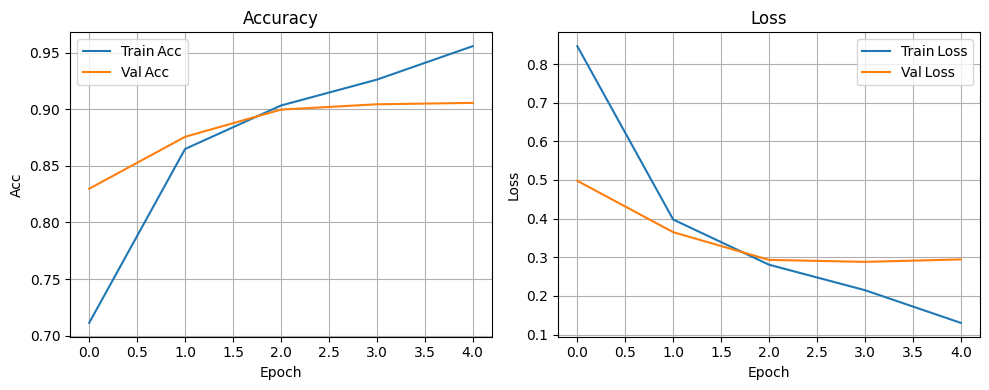

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Acc'); plt.legend(); plt.grid()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid()

plt.tight_layout()
plt.show()


Test on a validation image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


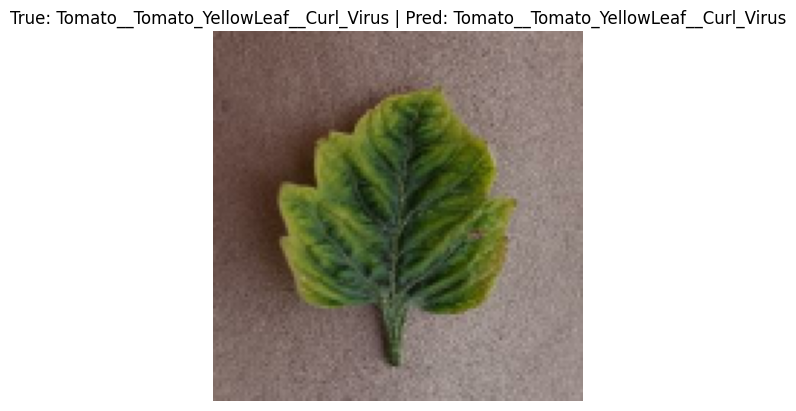

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class_names = train_ds.class_names  # list of class folder names

for images, labels in val_ds.take(1):
    img = images[0]
    true_lbl = class_names[labels[0].numpy()]

    # Predict class
    pred_probs = model.predict(tf.expand_dims(img, axis=0))
    pred_class = np.argmax(pred_probs[0])
    pred_lbl = class_names[pred_class]

    # Convert tensor to numpy image
    img_np = img.numpy().astype("uint8")

    # Plot the image
    plt.imshow(img_np)
    plt.title(f"True: {true_lbl} | Pred: {pred_lbl}")
    plt.axis('off')
    plt.show()
    break


TESTING

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


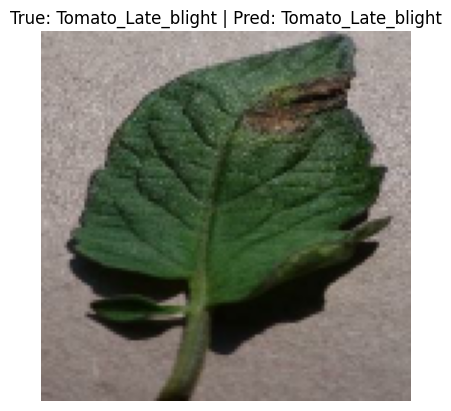

In [17]:
for images, labels in val_ds.take(1):
    index = 1  # ← change this to see different images: 0, 1, 2, ...
    img = images[index]
    true_lbl = class_names[labels[index].numpy()]

    pred_probs = model.predict(tf.expand_dims(img, axis=0))
    pred_class = np.argmax(pred_probs[0])
    pred_lbl = class_names[pred_class]

    plt.imshow(img.numpy().astype("uint8"))
    plt.title(f"True: {true_lbl} | Pred: {pred_lbl}")
    plt.axis('off')
    plt.show()
    break


Save the model

In [19]:
model.save("tomato_disease_model.keras")



To load the model later

In [20]:
from tensorflow import keras
model = keras.models.load_model("tomato_disease_model.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Show multiple images in a loop


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


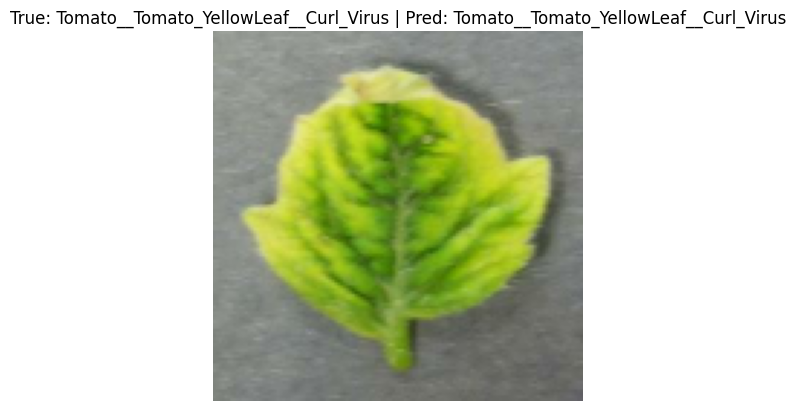

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


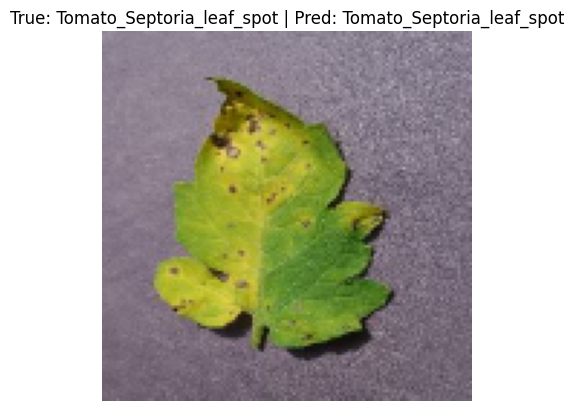

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


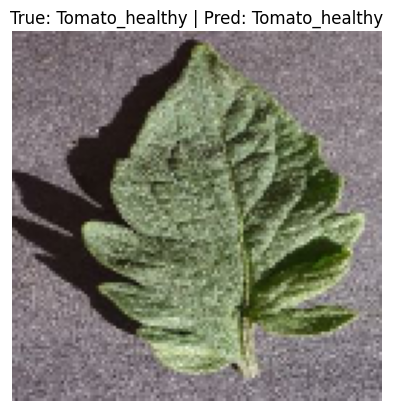

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


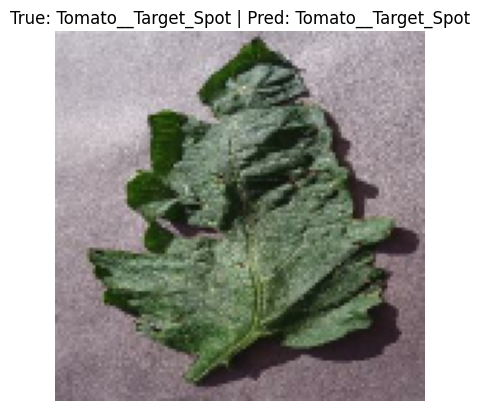

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


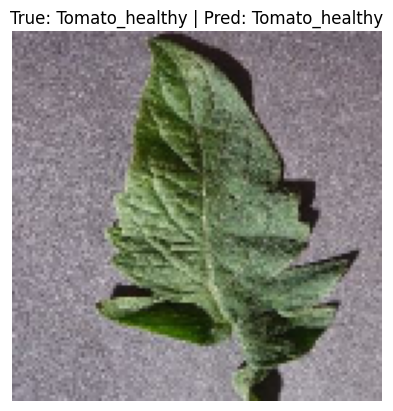

In [21]:
for images, labels in val_ds.take(1):
    for i in range(5):  # Show first 5 images
        img = images[i]
        true_lbl = class_names[labels[i].numpy()]

        pred_probs = model.predict(tf.expand_dims(img, axis=0))
        pred_class = np.argmax(pred_probs[0])
        pred_lbl = class_names[pred_class]

        plt.imshow(img.numpy().astype("uint8"))
        plt.title(f"True: {true_lbl} | Pred: {pred_lbl}")
        plt.axis('off')
        plt.show()


 Show random image each time

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


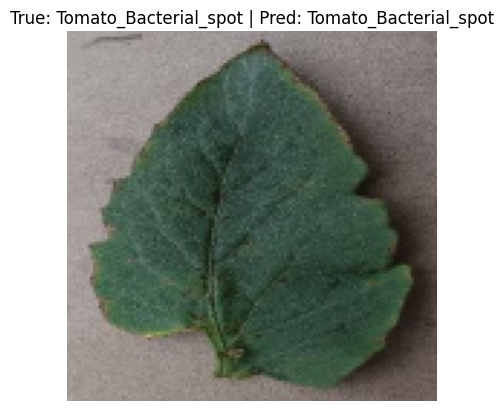

In [23]:
import random

for images, labels in val_ds.take(1):
    idx = random.randint(0, len(images)-1)
    img = images[idx]
    true_lbl = class_names[labels[idx].numpy()]

    pred_probs = model.predict(tf.expand_dims(img, axis=0))
    pred_class = np.argmax(pred_probs[0])
    pred_lbl = class_names[pred_class]

    plt.imshow(img.numpy().astype("uint8"))
    plt.title(f"True: {true_lbl} | Pred: {pred_lbl}")
    plt.axis('off')
    plt.show()
